In [14]:
#import skymapper as sk
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd


In [15]:
data = pf.open('piece_of_vhs.fits')[1].data

#ra = data['ra']
#dec = data['dec']

z = data['sof_cm_mag_corrected_z']
r = data['sof_cm_mag_corrected_r']
sg = data['EXTENDED_CLASS_MASH_SOF']
K = data['ksapermag3']

ksel = data['KSERRBITS']

FLAGS_BADREGIONS = data['FLAGS_BADREGIONS']
FLAGS_FOREGROUND = data['FLAGS_FOREGROUND']


clean = (ksel==0)*(sg>=0)*(FLAGS_BADREGIONS==0)*(FLAGS_FOREGROUND==0)*(z>0)*(z<32)*(r>0)*(r<32)*(K>0)

datared = data[clean]
print(len(data))
print(len(datared))

9318511
1097866


330.000002 349.999992
-59.999984999999995 -50.000009999999996
340.0021044522292 -54.93780818879172


(14, 24)

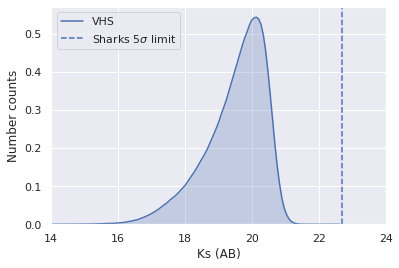

In [16]:
ra = datared['ra']
dec = datared['dec']
print(np.min(ra),np.max(ra))
print(np.min(dec),np.max(dec))
print(np.mean(ra),np.mean(dec))
z = datared['sof_cm_mag_corrected_z']
r = datared['sof_cm_mag_corrected_r']
sg = datared['EXTENDED_CLASS_MASH_SOF']
K = datared['ksapermag3']+1.827

df = pd.DataFrame(dict(ks=K,sg=sg,r=r,z=z,rz=r-z,zK=z-K))


sns.kdeplot(df.ks, shade=True,label='VHS')
plt.axvline(22.7,label=r'Sharks $5\sigma$ limit',linestyle='--')
plt.legend()
plt.xlabel('Ks (AB)')
plt.ylabel('Number counts')
plt.xlim([14,24])

In [ ]:
fig = plt.figure(figsize=(8,7))
#ax = fig..subplots()
sc= plt.scatter(df.rz,df.zK,c=df.sg,s=1,cmap=plt.cm.get_cmap('RdYlBu'),alpha=0.1)

cbar = fig.colorbar(sc, ticks=[0.5,2.5])#, ax=ax)
cbar.ax.set_yticklabels(['stars', 'galaxies'])

#plt.colorbar(sc,ax=ax)
plt.xlabel('r-z (AB)')
plt.ylabel('z-Ks (AB)')
plt.xlim([-1.,5])
plt.ylim([-3,4])
plt.title(r'$DES \cap VHS$')
x = np.linspace(-1., 5., 100)
y = 0.35*x
plt.plot(x, y, c='black', lw=1, ls='--')

#qso6 = pf.open('qso2.fits')[1].data
#rqso = qso6['SOF_PSF_MAG_R']
#zqso = qso6['SOF_PSF_MAG_Z']
#ksqso = qso6['ksapermag3']+1.827

#plt.plot(rqso-zqso,zqso-ksqso,'g*',label='QSO')
#plt.plot(x2m,y2m, c='green', lw=2)
plt.savefig('zks_rz.png')
#sns.jointplot(x="rz", y="zK", data=df)
#sns.scatter(x="rz", y="zK", hue="sg", data=df)
#sns.relplot(x="rz", y="zK", hue="sg", data=df);

In [ ]:
twomass = pf.open('fp_2mass_in_test_with_desvhs_forSLR.fits')[1].data

k = twomass['kvista']
r = twomass['SOF_CM_MAG_CORRECTED_R']
z = twomass['SOF_CM_MAG_CORRECTED_z']

sel = (k>0)*(r>0)*(r<30)*(z>0)*(z<30)

twoclean = twomass[sel]

k = twoclean['kvista']
r = twoclean['SOF_CM_MAG_CORRECTED_R']
z = twoclean['SOF_CM_MAG_CORRECTED_z']

zk = z-k
rz = r-z

x = np.linspace(-1,5,60)
x2m,y2m = [],[]
for i in range(len(x)-1):
    tempmask = (rz>x[i])*(rz<x[i+1])
    Trz = rz[tempmask]
    Tzk = zk[tempmask]
    if len(Trz)>0:
        x2m.append(np.mean(Trz))
        y2m.append(np.mean(Tzk))

        

Dx2m,Dy2m = [],[]
for i in range(len(x)-1):
    tempmask = (df.rz>x[i])*(df.rz<x[i+1])*(df.sg==0)
    Trz = df.rz[tempmask]
    Tzk = df.zK[tempmask]
    if len(Trz)>0:
        Dx2m.append(np.mean(Trz))
        Dy2m.append(np.mean(Tzk))


In [ ]:
#2mass https://academic.oup.com/mnras/article/474/4/5459/4683252
#Transformation from 2mass to VHS
# Ks_V=Ks_2−(0.006±0.007)⋅(J−Ks)2

In [ ]:
fig = plt.figure(figsize=(8,7))
#ax = fig..subplots()
sc= plt.scatter(df.rz,df.zK,c=df.sg,s=1,cmap=plt.cm.get_cmap('RdYlBu'),alpha=0.1)

cbar = fig.colorbar(sc, ticks=[0.5,2.5])#, ax=ax)
cbar.ax.set_yticklabels(['stars', 'galaxies'])

#plt.colorbar(sc,ax=ax)
plt.xlabel('r-z (AB)')
plt.ylabel('z-Ks (AB)')
plt.xlim([-1.,5])
plt.ylim([-3,4])
plt.title(r'$DES \cap VHS$')
x = np.linspace(-1., 5., 100)
y = 0.35*x
plt.plot(x, y, c='black', lw=1, ls='--')
plt.plot(x2m,y2m, c='green', lw=2,label='2MASS')
plt.plot(Dx2m,Dy2m, c='blue', lw=2,label='DES')
plt.legend()
plt.savefig('zks_rz_stellarlocus.png')
#sns.jointplot(x="rz", y="zK", data=df)
#sns.scatter(x="rz", y="zK", hue="sg", data=df)
#sns.relplot(x="rz", y="zK", hue="sg", data=df);